# Aufgabe - Morphologische Operatoren

In dieser Aufgabe geht es darum mittels morphologischer Operatoren Objekte in Bildern zu trennen und bestimmte Strukturieren zu eliminieren oder sichtbar zu machen.

Implementieren Sie die mit `#TODO` gekennzeichneten Codestellen und beachten sie die Hinweise unten.

## Teil 1

Binarisieren Sie das Bild der Münzen und wenden Sie morphologische Operatoren auf das Bild an, um die einzelnen Münzen voneinander zu trennen.

Das Bild enthält 10 Münzen


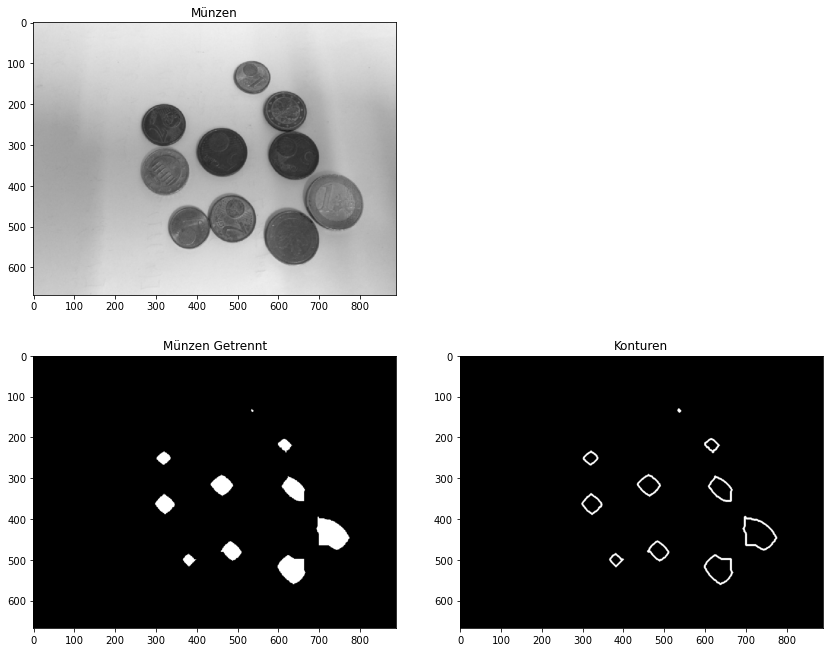

In [5]:
import os

import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline
from matplotlib import pyplot as plt

def binarisation(img):
    #binarisation
    #using kmeans with two clusters.
    km = KMeans(n_clusters=2)
    #compute center of white and black cluster 
    centerOfClusters = int(np.floor(sum(km.fit(img.ravel().reshape(-1,1)).cluster_centers_)/2))
    _, binaryImg = cv.threshold(img, centerOfClusters, 255, cv.THRESH_BINARY)
    #switch image to be compatible with the shape finding algorithm
    return cv.bitwise_not(binaryImg)

def applyOperations(operationMatrix, center, negateOutput, negateImg, img, times):
    result = img
    for i in range(times):
        result = applyOperation(operationMatrix, center, negateOutput, negateImg, result)
    return result

def applyOperation(operationMatrix, center, negateOutput, negateImg, img):
    #self implemented application of morphological operation (I have seen we should use the open cv
    #functons after I was done :( )
    sizeI = operationMatrix.shape[0]
    sizeJ = operationMatrix.shape[1]
    result = img.copy()
    if negateImg:
        img = cv.bitwise_not(img)
    for i in range(img.shape[0] - sizeI):
        for j in range(img.shape[1] - sizeJ):
            selection = img[i:(i + sizeI),j:(j + sizeJ)]
            if(np.array_equal(selection,operationMatrix)):
                if negateOutput:
                    result[i + center[0],j + center[1]] = 0
                else:
                    result[i + center[0],j + center[1]] = 255
            else:
                if negateOutput:
                    result[i + center[0],j + center[1]] = 255
                else:
                    result[i + center[0],j + center[1]] = 0
    return result

def count_shapes(img):
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contour_img = np.zeros(img.shape, np.uint8)
    cv.drawContours(contour_img, contours, -1, 255, 3)
    return len(contours), contour_img

def coins(img):
    binaryImg = binarisation(img)
    #define structurizing elements
    erosion5x5 = np.zeros((5,5))
    erosion5x5[:,:] = 255
    erosion51x51 = np.zeros((61,61))
    erosion51x51[:,:] = 255
    #coin dialation to close the holes in  the points
    binaryImg = applyOperations(erosion5x5,(2,2),True, True, binaryImg, 1)
    #coin erosion to make the coins seperate areas
    binaryImg = applyOperations(erosion51x51,(30,30),False, False, binaryImg, 1)
    return binaryImg

    

dir_resources = '../resources'
img = cv.imread(os.path.join(dir_resources, 'Muenzen1.jpg'), cv.IMREAD_GRAYSCALE)

coin_img = coins(img.copy())

shape_count, shape_img = count_shapes(coin_img)
print(f'Das Bild enthält {shape_count} Münzen')

fig, axs = plt.subplots(2, 2, figsize = (12, 9))
fig.tight_layout(h_pad=4)
_ = axs[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
_ = axs[0, 0].set_title('Münzen')
_ = axs[1, 0].imshow(coin_img, cmap='gray')
_ = axs[1, 0].set_title('Münzen Getrennt')
_ = axs[1, 1].imshow(shape_img, cmap='gray')
_ = axs[1, 1].set_title('Konturen')
_ = axs[0, 1].axis('off')

## Teil 2

Binarisieren Sie das Bild der Striche und wenden Sie morphologische Operatoren auf das Bild an, um die Striche voneinander zu trennen.
Trennen Sie in der ersten Funktion die vertikalen und in der zweiten Funktion die diagonalen Striche.


Das Bild enthält 3 vertikale und 12 diagonale Striche


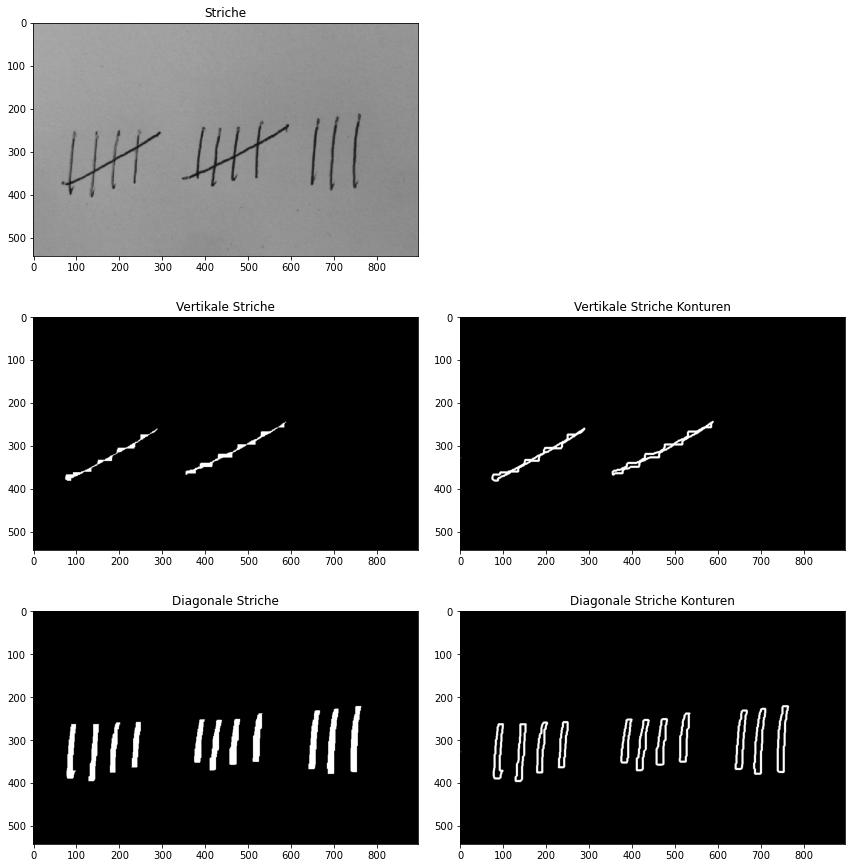

In [56]:
def vertical_lines(img):
    binaryImg = binarisation(img)
    #dilatation
    erosion11x11 = np.zeros((13,13))
    erosion11x11[:,:] = 255
    binaryImg = applyOperations(erosion11x11,(7,7),True, True, binaryImg, 1)
    erosion31x5 = np.zeros((5,27))
    erosion31x5[:,:] = 255
    binaryImg = applyOperations(erosion31x5,(2,13),False, False, binaryImg, 1)
    erosion3x3 = np.zeros((3,3))
    erosion3x3[:,:] = 255
    binaryImg = applyOperations(erosion3x3,(1,1),False, False, binaryImg, 1)
    return binaryImg

def diagonal_lines(img):
    binaryImg = binarisation(img)
    #dilatation
    erosion11x11 = np.zeros((15,15))
    erosion11x11[:,:] = 255
    binaryImg = applyOperations(erosion11x11,(7,7),True, True, binaryImg, 1)
    erosion31x5 = np.zeros((35,5))
    erosion31x5[:,:] = 255
    binaryImg = applyOperations(erosion31x5,(17,1),False, False, binaryImg, 1)
    return binaryImg

img = cv.imread(os.path.join(dir_resources, 'Striche.jpg'), cv.IMREAD_GRAYSCALE)

vertical_line_img = vertical_lines(img.copy())
diagonal_line_img = diagonal_lines(img.copy())

shape_count_vertical, shape_img_vertical = count_shapes(vertical_line_img)
shape_count_diagonal, shape_img_diagonal = count_shapes(diagonal_line_img)
print(f'Das Bild enthält {shape_count_vertical} vertikale und {shape_count_diagonal} diagonale Striche')

fig, axs = plt.subplots(3, 2, figsize = (12, 12))
fig.tight_layout(h_pad=4)
_ = axs[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
_ = axs[0, 0].set_title('Striche')
_ = axs[0, 1].axis('off')
_ = axs[1, 0].imshow(vertical_line_img, cmap='gray')
_ = axs[1, 0].set_title('Vertikale Striche')
_ = axs[1, 1].imshow(shape_img_vertical, cmap='gray')
_ = axs[1, 1].set_title('Vertikale Striche Konturen')
_ = axs[2, 0].imshow(diagonal_line_img, cmap='gray')
_ = axs[2, 0].set_title('Diagonale Striche')
_ = axs[2, 1].imshow(shape_img_diagonal, cmap='gray')
_ = axs[2, 1].set_title('Diagonale Striche Konturen')

### Hinweise:

* Zum Binarisieren der Bilder nutzen Sie die OpenCV Funktione [threshold](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html) 
* Nutzen Sie die Implementation der [Morphologischen Operation](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) von OpenCV
* Welchen Schwellwert man für die Binarisierung nimmt und welche Filter man wie oft anwendet hat viel mit ausprobieren zu tun